In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("internet_usage.csv")
print(df.head())

   daily_usage_hours  site_categories_visited  sessions_per_day
0           9.884957                        2                13
1           1.023220                        9                 1
2          10.394205                        9                 3
3           5.990237                        6                16
4           3.558451                        4                 4


In [ ]:
X = df[['daily_usage_hours', 'site_categories_visited', 'sessions_per_day']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
inertias = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

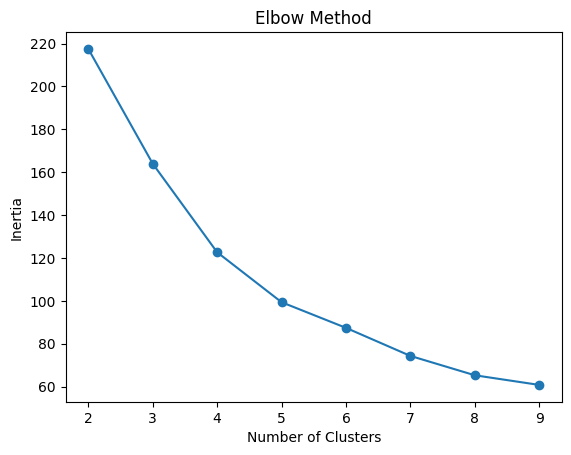

In [ ]:
plt.plot(range(2, 10), inertias, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(X_scaled)

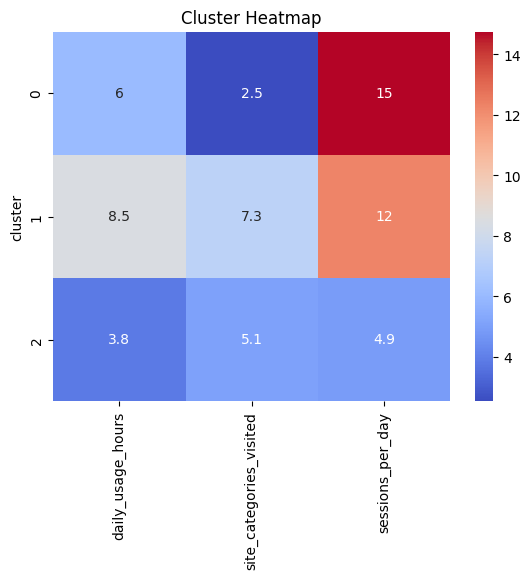

In [ ]:
cluster_means = df.groupby('cluster').mean()
sns.heatmap(cluster_means, annot=True, cmap='coolwarm')
plt.title("Cluster Heatmap")
plt.show()